# WeatherPy

### Analysis

In [62]:
# import dependencies
from citipy import citipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import openweathermapy as owm
from config import api_key
import requests

### Generate Cities List

In [116]:
random_pool_count = 1200
# random latitudes
lat_north = np.random.rand(1,random_pool_count)*90
lat_south = np.random.rand(1,random_pool_count)*(-90)
lats = lat_north + lat_south

# random longtitudes
long_east = np.random.rand(1,random_pool_count)*180
long_west = np.random.rand(1,random_pool_count)*(-180)
longs = long_east + long_west

stacked_locs = np.dstack((lats, longs))

# generate cities list by citipy
cities_locs = stacked_locs[0]
cities = [citipy.nearest_city(lat, long).city_name for lat, long in cities_locs]

# the unique cities
cities = set(cities)

# cities

In [117]:
# unique cities
print(f"The number of unique countries: {len(cities)}")

The number of unique countries: 662


### Perform API Calls

In [118]:
# settings = {"units":"Imperial", "APPID": api_key}
units = "Imperial"

# create an empty dataframe
# and initalize the columns with empty strings
city_data_pd = pd.DataFrame()
city_data_pd['City'] = ''
city_data_pd['Cloudiness'] = ''
city_data_pd['Country'] = ''
city_data_pd['Date'] = ''
city_data_pd['Humidity'] = ''
city_data_pd['Lat'] = ''
city_data_pd['Lng'] = ''
city_data_pd['Max Temp'] = ''
city_data_pd['Wind Speed'] = ''

# iterate over the cities and make restful api calls
for city_num, city_name in enumerate(cities):
    # make the api call to the query url
    query_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&APPID={api_key}&q={city_name}"
    resp = requests.get(query_url)
    status_code = resp.status_code
    url = resp.url
    
    # print the log 
    print(f"Processing Record {city_num+1} | {city_name} \n{url}")
    
    # check on the response status code
    if status_code == 200:
        # jsonify the response
        content = resp.json()
        # populate the dataframe
        city_data_pd.loc[city_num, 'City'] = city_name
        city_data_pd.loc[city_num, 'Cloudiness'] = content.get('clouds').get('all')
        city_data_pd.loc[city_num, 'Country'] = content.get('sys').get('country')
        city_data_pd.loc[city_num, 'Date'] = content.get('dt')
        city_data_pd.loc[city_num, 'Humidity'] = content.get('main').get('humidity')
        city_data_pd.loc[city_num, 'Lat'] = content.get('coord').get('lat')
        city_data_pd.loc[city_num, 'Lng'] = content.get('coord').get('lon')
        city_data_pd.loc[city_num, 'Max Temp'] = content.get('main').get('temp_max')
        city_data_pd.loc[city_num, 'Wind Speed'] = content.get('wind').get('speed')
    else:
        print("Failed to get the response!! Remote server is not reachable.")


Processing Record 1 | bathsheba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bathsheba
Processing Record 2 | tupiza 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tupiza
Processing Record 3 | luzhany 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=luzhany
Processing Record 4 | meyungs 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=meyungs
Failed to get the response!! Remote server is not reachable.
Processing Record 5 | cururupu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=cururupu
Processing Record 6 | kathua 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kathua
Processing Record 7 | kidal 
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 55 | walvis bay 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=walvis%20bay
Processing Record 56 | shakawe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=shakawe
Processing Record 57 | marcona 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=marcona
Failed to get the response!! Remote server is not reachable.
Processing Record 58 | tiksi 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tiksi
Processing Record 59 | trincomalee 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=trincomalee
Processing Record 60 | barentsburg 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=barentsburg
Failed to get the response!! Remote server is not reachable.


Processing Record 108 | peniche 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=peniche
Processing Record 109 | luebo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=luebo
Processing Record 110 | aquiraz 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=aquiraz
Processing Record 111 | dunda 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=dunda
Processing Record 112 | rong kwang 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=rong%20kwang
Processing Record 113 | cibitoke 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=cibitoke
Processing Record 114 | gobabis 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&

Processing Record 163 | casablanca 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=casablanca
Processing Record 164 | saint anthony 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=saint%20anthony
Processing Record 165 | lazaro cardenas 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=lazaro%20cardenas
Processing Record 166 | iralaya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=iralaya
Processing Record 167 | beidao 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=beidao
Processing Record 168 | bodden town 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bodden%20town
Processing Record 169 | finschhafen 
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 217 | punta arenas 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=punta%20arenas
Processing Record 218 | nouakchott 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nouakchott
Processing Record 219 | yokadouma 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=yokadouma
Processing Record 220 | matara 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=matara
Processing Record 221 | hirara 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=hirara
Processing Record 222 | liverpool 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=liverpool
Processing Record 223 | simpang 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945

Processing Record 269 | emirdag 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=emirdag
Processing Record 270 | waddan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=waddan
Processing Record 271 | yermakovskoye 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=yermakovskoye
Processing Record 272 | umzimvubu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=umzimvubu
Failed to get the response!! Remote server is not reachable.
Processing Record 273 | bengkulu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bengkulu
Failed to get the response!! Remote server is not reachable.
Processing Record 274 | katsuura 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=katsu

Processing Record 322 | belle glade 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=belle%20glade
Processing Record 323 | buraydah 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=buraydah
Processing Record 324 | cabo san lucas 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=cabo%20san%20lucas
Processing Record 325 | lorengau 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=lorengau
Processing Record 326 | griffith 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=griffith
Processing Record 327 | kourou 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kourou
Processing Record 328 | sioux lookout 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 375 | qasigiannguit 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=qasigiannguit
Processing Record 376 | severo-kurilsk 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=severo-kurilsk
Processing Record 377 | caravelas 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=caravelas
Processing Record 378 | chuy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=chuy
Processing Record 379 | thompson 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=thompson
Processing Record 380 | kutum 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kutum
Processing Record 381 | mangaluru 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a99

Processing Record 431 | faya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=faya
Processing Record 432 | luanshya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=luanshya
Processing Record 433 | praia da vitoria 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=praia%20da%20vitoria
Processing Record 434 | guerrero negro 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=guerrero%20negro
Processing Record 435 | turayf 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=turayf
Processing Record 436 | klaksvik 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=klaksvik
Processing Record 437 | lircay 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3

Processing Record 484 | caxias 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=caxias
Processing Record 485 | kunnamkulam 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kunnamkulam
Processing Record 486 | mazyr 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mazyr
Processing Record 487 | davila 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=davila
Processing Record 488 | bubaque 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bubaque
Processing Record 489 | belushya guba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=belushya%20guba
Failed to get the response!! Remote server is not reachable.
Processing Record 490 | kuryk 
http://api.openweathermap.org/

Processing Record 539 | pundaguitan 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=pundaguitan
Processing Record 540 | benghazi 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=benghazi
Processing Record 541 | waqqas 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=waqqas
Processing Record 542 | udhampur 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=udhampur
Processing Record 543 | barabai 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=barabai
Processing Record 544 | tocopilla 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tocopilla
Processing Record 545 | carbonia 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f423

Processing Record 593 | ust-karsk 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=ust-karsk
Processing Record 594 | butaritari 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=butaritari
Processing Record 595 | paragominas 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=paragominas
Processing Record 596 | namibe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=namibe
Processing Record 597 | zachagansk 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=zachagansk
Failed to get the response!! Remote server is not reachable.
Processing Record 598 | telhara 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=telhara
Processing Record 599 | tidore 
http://api.openweathe

Processing Record 647 | tyrma 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=tyrma
Processing Record 648 | mutsamudu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mutsamudu
Failed to get the response!! Remote server is not reachable.
Processing Record 649 | gorom-gorom 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=gorom-gorom
Processing Record 650 | altamira 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=altamira
Processing Record 651 | kijang 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kijang
Processing Record 652 | geraldton 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=geraldton
Processing Record 653 | norman wells 
http://api.openweathermap

In [119]:
# Statistics of the city data frame
city_data_pd.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [141]:
# drop the nan's
city_data_pd = city_data_pd.dropna()
city_data_pd.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [124]:
# Visualize the city data frame
city_data_pd.head(30)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bathsheba,40,BB,1526958000,83,13.22,-59.52,77,19.46
1,tupiza,0,BO,1526959861,53,-21.44,-65.72,19.33,2.57
2,luzhany,0,UA,1526956200,93,48.36,25.77,48.2,6.71
4,cururupu,32,BR,1526959862,92,-1.82,-44.87,76.84,4.36
5,kathua,8,IN,1526959854,19,32.38,75.52,86.83,4.14
6,kidal,92,ML,1526959862,21,18.44,1.41,86.65,3.69
7,kabinda,68,CD,1526959863,96,-6.14,24.49,67.93,4.92
8,yellowknife,75,CA,1526954400,28,62.45,-114.38,68,14.99
9,songjianghe,92,CN,1526959863,63,42.18,127.48,59.92,9.73
10,takoradi,0,GH,1526959863,100,4.89,-1.75,79.18,5.7


### Latitude vs Temperature Plot 

(0, 100)

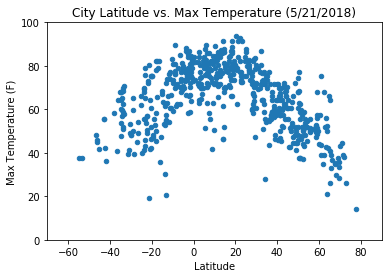

In [162]:
city_data_pd['Max Temp'] = pd.to_numeric(city_data_pd['Max Temp'])
ax = city_data_pd.plot.scatter(x='Lat',y='Max Temp',marker='o')
ax.set_title("City Latitude vs. Max Temperature (5/21/2018)")
ax.set_ylabel("Max Temperature (F)")
ax.set_xlabel("Latitude")
ax.set_xlim(-70, 90)
ax.set_ylim(0,100)

### Latitude vs. Humidity Plot

Text(0.5,0,'Latitude')

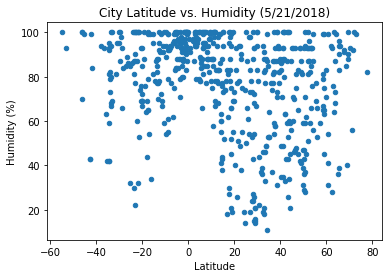

In [167]:
city_data_pd['Humidity'] = pd.to_numeric(city_data_pd['Humidity'])
ax = city_data_pd.plot.scatter(x='Lat',y='Humidity',marker='o')
ax.set_title("City Latitude vs. Humidity (5/21/2018)")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")

### Latitude vs. Cloudiness Plot

Text(0.5,0,'Latitude')

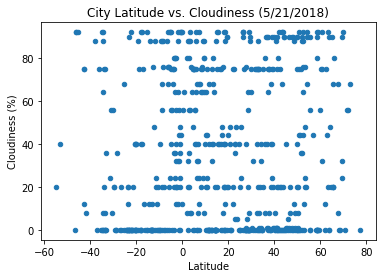

In [170]:
city_data_pd['Cloudiness'] = pd.to_numeric(city_data_pd['Cloudiness'])
ax = city_data_pd.plot.scatter(x='Lat',y='Cloudiness',marker='o')
ax.set_title("City Latitude vs. Cloudiness (5/21/2018)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")

### Latitude vs. Wind Speed Plot

Text(0.5,0,'Latitude')

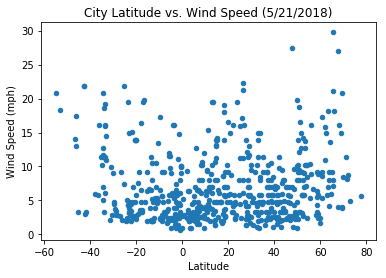

In [173]:
city_data_pd['Wind Speed'] = pd.to_numeric(city_data_pd['Wind Speed'])
ax = city_data_pd.plot.scatter(x='Lat',y='Wind Speed',marker='o')
ax.set_title("City Latitude vs. Wind Speed (5/21/2018)")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")